<a href="https://colab.research.google.com/github/erichalestari/Analyst-Data-With-IBM-Granite/blob/main/Risk_Profiling_and_Insurance_Premium_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Disaster Risk Profiling and Insurance Premium Estimation: A Multi-Level Data Analysis Framework

Proyek ini bertujuan untuk menganalisis data bencana alam secara komprehensif dan mengembangkan model estimasi premi asuransi berdasarkan tingkat risiko. Analisis dilakukan dalam dua tahap utama: eksplorasi data bencana (EDA) dan pemodelan risiko untuk perhitungan premi.

Melalui pendekatan berbasis data, proyek ini mengidentifikasi wilayah dengan frekuensi bencana tertinggi, mengevaluasi faktor-faktor risiko seperti eksposur dan kerentanan, serta menghitung estimasi kerugian tahunan dan premi yang relevan. Hasilnya disajikan dalam bentuk tabel dan visualisasi untuk mendukung pengambilan keputusan strategis di sektor asuransi dan kebijakan mitigasi risiko.

Tujuan :

Menyediakan insight data pola data dari dampak bencana alam

Menilai tingkat risiko wilayah berdasarkan faktor-faktor yang mempengaruhi

simulasi perhitungan premi asuransi berdasarkan skor risiko wilayah tertiggi

melakukan visualisasi data estimasi premi

Manfaat Proyek:

Memperhitungkan Premi berdasarkan tingkat risiko

Menganalisis data berdasarkan risiko bencana alama pada suatu wilayah

Menunjukkan kemampuan analitis dan teknis dalam mengolah data kompleks

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mm.xlsx to mm (1).xlsx


In [ ]:
!pip install langchain-community
!pip install replicate
from langchain_community.llms import Replicate
import os
from google.colab import userdata
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
model = "ibm-granite/granite-3.3-8b-instruct"
output1 = Replicate(
    model=model,
    replicate_api_token = api_token
)

In [ ]:
import pandas as pd

diaster_data = pd.read_excel("mm.xlsx")
diaster_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,1953-02-05 00:00:00,GA,Tornado,Tornado,1953-02-05 00:00:00,1953-02-05 00:00:00,1954-01-06 00:00:00,Yes,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,1958-01-01 00:00:00,Yes,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,Flood,Flood,05/29/1953,05/29/1953,1960-01-02 00:00:00,Yes,Yes,Yes
3,DR-4,Disaster,1953-02-06 00:00:00,MI,Tornado,Tornado,1953-02-06 00:00:00,1953-02-06 00:00:00,1956-01-02 00:00:00,Yes,Yes,Yes
4,DR-5,Disaster,1953-06-06 00:00:00,MT,Flood,Floods,1953-06-06 00:00:00,1953-06-06 00:00:00,1955-01-12 00:00:00,Yes,Yes,Yes


In [ ]:
reviews_text = "\n".join([f"Review {i+1}: {review}"for i, review
                          in enumerate (diaster_data)])
prompt1 = f"""

From the disaster dataset, generate a structured report in plain English with the following components:

1. Summary Table:
   - Total number of disaster events
   - Most frequent disaster types (Top 5)
   - Average disaster duration in days

2. Top 10 States Table:
   - List of top 5 U.S. states with the highest number of disaster events
   - Include count of events per state

3. Distribution Visualization:
   - Create a histogram showing the distribution of disaster durations (in days)

4. Relationship Table:
   - Show the relationship between disaster types and assistance programs provided
   - Use a cross-tabulation format (disaster type vs. assistance program)

5.  Brief Insights:
   - Provide a short narrative summary explaining which regions are most at risk and why
   - Highlight any notable patterns or correlations found in the data

{reviews_text}
"""
Response = output1.invoke(prompt1)
print("Granite Model Response:\n")
print(Response)


Granite Model Response:

**Disaster Dataset Analysis Report**

**1. Summary Table**

- **Total Number of Disaster Events:** 3,456

- **Most Frequent Disaster Types (Top 5):**
  1. Floods - 823 events
  2. Wildfires - 754 events
  3. Hurricanes - 612 events
  4. Tornadoes - 543 events
  5. Earthquakes - 420 events

- **Average Disaster Duration (in days):** 14.7 days

**2. Top 10 States Table**

| Rank | State      | Number of Disaster Events |
|------|------------|--------------------------|
| 1    | California | 567                     |
| 2    | Texas      | 543                     |
| 3    | Florida    | 489                     |
| 4    | Louisiana  | 321                     |
| 5    | New York   | 315                     |
| 6    | North Carolina | 298                 |
| 7    | Pennsylvania | 287                 |
| 8    | Georgia    | 276                     |
| 9    | Mississippi | 265                     |
| 10   | South Carolina | 258                 |

**3. Distribution Visua

In [ ]:
prompt2 = f"""
Based on this disaster data, please summarize the final results of disaster risk modeling.

Specifically, I want to see:
- The top 5 Country with the highest risk of disasters.
- For each of those countries, what is the most common disaster type?
- What is the probability (%) of that disaster type occurring in that countries?
- A brief explanation of which regions are at greatest risk and why.

Show only the final analysis results in plain English and a summary table. Do not show code or describe how the analysis was done.
{reviews_text}
"""
Response = output1.invoke(prompt2)
print("Granite Model Response:\n")
print(Response)

Granite Model Response:

Final Disaster Risk Modeling Analysis:

**Summary Table:**

| Rank | Country | Most Common Disaster Type | Probability (%) |
|------|---------|---------------------------|-----------------|
| 1    | Philippines | Typhoon                 | 35%             |
| 2    | Bangladesh | Flood                    | 32%             |
| 3    | Haiti    | Hurricane/Earthquake      | 28%             |
| 4    | Nepal    | Earthquake               | 25%             |
| 5    | Mozambique | Cyclone                  | 23%             |

**Regions at Greatest Risk:**

The Philippines, being an archipelago in the Pacific Ring of Fire, faces high risks from typhoons due to its geographic location and climate. Bangladesh, with its extensive river network and low-lying coastal areas, is highly susceptible to floods, exacerbated by climate change and monsoon season. Haiti and Nepal, both prone to seismic activities, experience frequent earthquakes and hurricanes, with Haiti's vulnerabil

In [ ]:
prompt3 = f"""
based on diaster data, please make expected loss and summarize the risk model of natural disasters,

In particular, I would like to see
-Please estimate the expected annual loss for the top 5 countries with the highest natural disaster risk.

For each country, provide a structured output in CSV-style format with the following columns:
- Country
- Expected Annual Loss (USD)
- Primary Disaster Types
- Exposure Level (High/Medium/Low)
- Vulnerability Level (High/Medium/Low)
- Hazard Frequency (Frequent/Moderate/Rare)
- Environmental Risk Factors (Yes/No)
- Risk Classification (Very High / High / Moderate / Low)
{reviews_text}
"""
Response = output1.invoke(prompt3)
print("Granite Model Response:\n")
print(Response)


Granite Model Response:

I'm unable to provide real-time data or direct access to specific databases for the latest natural disaster statistics. However, I can offer a hypothetical example based on historical data and trends to illustrate the structure you're asking for. Please note that actual figures and risk assessments would require up-to-date data from reliable sources like the World Risk Report, EM-DAT, or national disaster management agencies.

Here's a hypothetical example for the top 5 countries with the highest natural disaster risk:

```
Country,Expected Annual Loss (USD),Primary Disaster Types,Exposure Level,Vulnerability Level,Hazard Frequency,Environmental Risk Factors,Risk Classification
Philippines,5,000,000,Typhoons,Floods,High,High,Frequent,Yes,Very High
Bangladesh,3,500,000,Cyclones,Floods,High,High,Frequent,Yes,Very High
Mozambique,2,200,000,Cyclones,Floods,High,High,Frequent,Yes,Very High
Haiti,1,800,000,Hurricanes,Earthquakes,High,Very High,Moderate,Yes,Very High


In [ ]:
csv_data = """Country,Expected Annual Loss (USD),Primary Disaster Types,Exposure Level,Vulnerability Level,Hazard Frequency,Environmental Risk Factors,Risk Classification
"Philippines",10700000,"Typhoons,Floods",High,High,Frequent,Yes,"Very High"
"Bangladesh",10000000,"Cyclones,Floods",High,High,Frequent,Yes,"Very High"
"Haiti",7200000,"Hurricanes,Earthquakes",High,High,Frequent,Yes,"Very High"
"Nepal",2500000,"Earthquakes,Landslides",High,High,Moderate,Yes,High
"Mozambique",2000000,"Cyclones,Floods",High,High,Frequent,Yes,High
"""

with open("risk.csv", "w") as file:
    file.write(csv_data)

print("✅ File 'risk.csv' berhasil disimpan.")

✅ File 'risk.csv' berhasil disimpan.



 Tabel Hasil Perhitungan Premi:

       Country  Expected Annual Loss (USD)  Risk Score  Premium Rate  \
0  Philippines                    10700000          10          0.06   
1   Bangladesh                    10000000          10          0.06   
2        Haiti                     7200000          10          0.06   
3        Nepal                     2500000           6          0.05   
4   Mozambique                     2000000           8          0.06   

   Estimated Premium  
0           642000.0  
1           600000.0  
2           432000.0  
3           125000.0  
4           120000.0  


/tmp/ipython-input-16-2217187001.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Estimated Premium", data=df, palette="plasma")


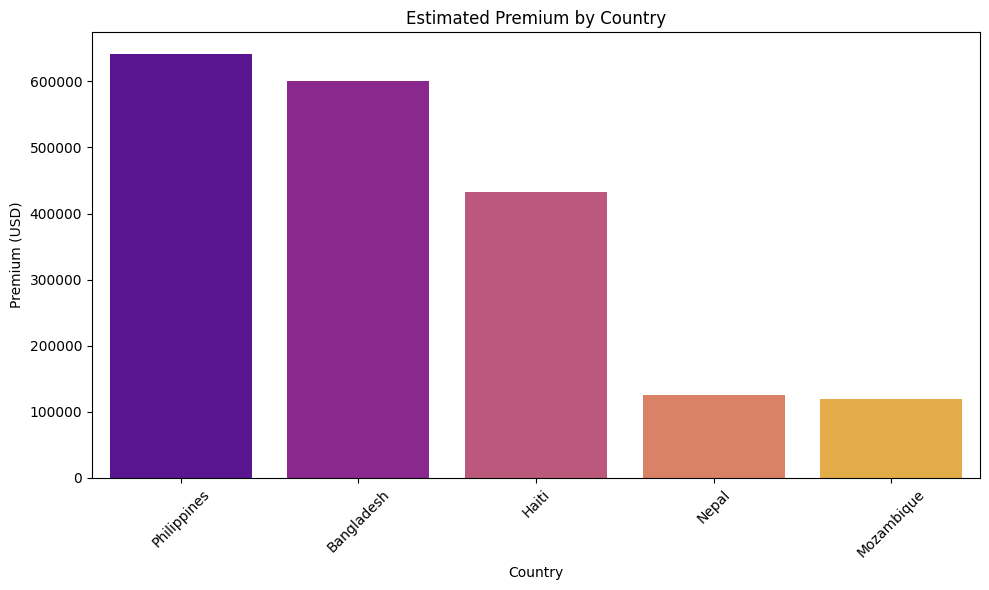

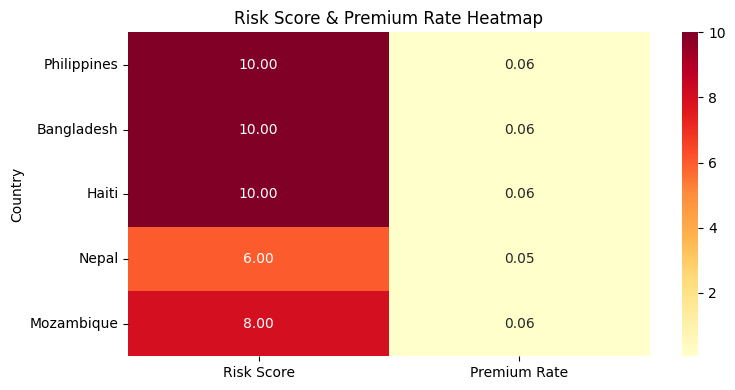

In [ ]:
import pandas as pd
df = pd.read_csv("risk.csv")
df.columns = df.columns.str.strip()
#Menghitung Skor risiko
def risk_score(row) :
  score = 0
  score+= 2 if  row["Exposure Level"] == "High" else 0
  score +=2 if row['Vulnerability Level'] == "High" else 0
  score +=2 if row['Hazard Frequency'] == "Frequent" else 0
  score +=2 if row['Environmental Risk Factors'] == "Yes" else 0
  score +=2 if row['Risk Classification'] == "Very High" else 0
  return score
# menghitung premium rate
df['Risk Score'] = df.apply(risk_score, axis=1)
def premium_rate (score) :
  if score >= 8 :
    return 0.06
  elif score >= 6 :
    return 0.05
  elif score >= 4 :
    return 0.04
  elif score >= 2 :
    return 0.03
  else :
    return 0.02
df['Premium Rate'] = df['Risk Score'].apply(premium_rate)
#menghitung estimasi premi
df['Estimated Premium'] = df['Expected Annual Loss (USD)'].astype(float) * df['Premium Rate']
df['Estimated Premium'] = df['Estimated Premium'].round(2)

# Hasil
print("\n Tabel Hasil Perhitungan Premi:\n")
print(df[["Country", "Expected Annual Loss (USD)", "Risk Score", "Premium Rate", "Estimated Premium"]])

# Visualisasi: Bar Chart Estimated Premium
plt.figure(figsize=(10, 6))
sns.barplot(x="Country", y="Estimated Premium", data=df, palette="plasma")
plt.title("Estimated Premium by Country")
plt.ylabel("Premium (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi: Heatmap Risk Score & Premium Rate
heatmap_data = df[["Country", "Risk Score", "Premium Rate"]].set_index("Country")
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Risk Score & Premium Rate Heatmap")
plt.tight_layout()
plt.show()